In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

## Raw data

In [2]:
# if os.path.isdir('train/barbutellus') is False:
#     os.makedirs('train/barbutellus')
#     os.makedirs('train/bohemicus')
#     os.makedirs('train/campestris')
#     os.makedirs('train/cryptarum')
#     os.makedirs('train/distinguendus')
#     os.makedirs('train/hortorum')
#     os.makedirs('train/hypnorum')
#     os.makedirs('train/jonellus')
#     os.makedirs('train/lapidarius')
#     os.makedirs('train/lucorum')
#     os.makedirs('train/magnus')
#     os.makedirs('train/monticola')
#     os.makedirs('train/muscorum')
#     os.makedirs('train/pascuorum')
#     os.makedirs('train/pratorum')
#     os.makedirs('train/ruderarius')
#     os.makedirs('train/rupestris')
#     os.makedirs('train/sylvarum')
#     os.makedirs('train/sylvestris')
#     os.makedirs('train/terrestris')
#     os.makedirs('train/vestalis')
    
#     os.makedirs('validate/barbutellus')
#     os.makedirs('validate/bohemicus')
#     os.makedirs('validate/campestris')
#     os.makedirs('validate/cryptarum')
#     os.makedirs('validate/distinguendus')
#     os.makedirs('validate/hortorum')
#     os.makedirs('validate/hypnorum')
#     os.makedirs('validate/jonellus')
#     os.makedirs('validate/lapidarius')
#     os.makedirs('validate/lucorum')
#     os.makedirs('validate/magnus')
#     os.makedirs('validate/monticola')
#     os.makedirs('validate/muscorum')
#     os.makedirs('validate/pascuorum')
#     os.makedirs('validate/pratorum')
#     os.makedirs('validate/ruderarius')
#     os.makedirs('validate/rupestris')
#     os.makedirs('validate/sylvarum')
#     os.makedirs('validate/sylvestris')
#     os.makedirs('validate/terrestris')
#     os.makedirs('validate/vestalis')
    
#     for i in random.sample(glob.glob('*barbutellus*'), 24):
#         shutil.move(i, 'train/barbutellus')      
#     for i in random.sample(glob.glob('*bohemicus*'), 24):
#         shutil.move(i, 'train/bohemicus')
#     for i in random.sample(glob.glob('*campestris*'), 24):
#         shutil.move(i, 'train/campestris')
#     for i in random.sample(glob.glob('*cryptarum*'), 24):
#         shutil.move(i, 'train/cryptarum')
#     for i in random.sample(glob.glob('*distinguendus*'), 24):
#         shutil.move(i, 'train/distinguendus')
#     for i in random.sample(glob.glob('*hortorum*'), 24):
#         shutil.move(i, 'train/hortorum')
#     for i in random.sample(glob.glob('*hypnorum*'), 24):
#         shutil.move(i, 'train/hypnorum')      
#     for i in random.sample(glob.glob('*jonellus*'), 24):
#         shutil.move(i, 'train/jonellus')
#     for i in random.sample(glob.glob('*lapidarius*'), 24):
#         shutil.move(i, 'train/lapidarius')
#     for i in random.sample(glob.glob('*lucorum*'), 24):
#         shutil.move(i, 'train/lucorum')
#     for i in random.sample(glob.glob('*magnus*'), 24):
#         shutil.move(i, 'train/magnus')
#     for i in random.sample(glob.glob('*monticola*'), 24):
#         shutil.move(i, 'train/monticola')
#     for i in random.sample(glob.glob('*muscorum*'), 24):
#         shutil.move(i, 'train/muscorum')      
#     for i in random.sample(glob.glob('*pascuorum*'), 24):
#         shutil.move(i, 'train/pascuorum')
#     for i in random.sample(glob.glob('*pratorum*'), 24):
#         shutil.move(i, 'train/pratorum')
#     for i in random.sample(glob.glob('*ruderarius*'), 24):
#         shutil.move(i, 'train/ruderarius')
#     for i in random.sample(glob.glob('*rupestris*'), 24):
#         shutil.move(i, 'train/rupestris')
#     for i in random.sample(glob.glob('*sylvarum*'), 24):
#         shutil.move(i, 'train/sylvarum')
#     for i in random.sample(glob.glob('*sylvestris*'), 24):
#         shutil.move(i, 'train/sylvestris')      
#     for i in random.sample(glob.glob('*terrestris*'), 24):
#         shutil.move(i, 'train/terrestris')
#     for i in random.sample(glob.glob('*vestalis*'), 24):
#         shutil.move(i, 'train/vestalis')
        
#     for i in random.sample(glob.glob('*barbutellus*'), 6):
#         shutil.move(i, 'validate/barbutellus')      
#     for i in random.sample(glob.glob('*bohemicus*'), 6):
#         shutil.move(i, 'validate/bohemicus')
#     for i in random.sample(glob.glob('*campestris*'), 6):
#         shutil.move(i, 'validate/campestris')
#     for i in random.sample(glob.glob('*cryptarum*'), 6):
#         shutil.move(i, 'validate/cryptarum')
#     for i in random.sample(glob.glob('*distinguendus*'), 6):
#         shutil.move(i, 'validate/distinguendus')
#     for i in random.sample(glob.glob('*hortorum*'), 6):
#         shutil.move(i, 'validate/hortorum')
#     for i in random.sample(glob.glob('*hypnorum*'), 6):
#         shutil.move(i, 'validate/hypnorum')      
#     for i in random.sample(glob.glob('*jonellus*'), 6):
#         shutil.move(i, 'validate/jonellus')
#     for i in random.sample(glob.glob('*lapidarius*'), 6):
#         shutil.move(i, 'validate/lapidarius')
#     for i in random.sample(glob.glob('*lucorum*'), 6):
#         shutil.move(i, 'validate/lucorum')
#     for i in random.sample(glob.glob('*magnus*'), 6):
#         shutil.move(i, 'validate/magnus')
#     for i in random.sample(glob.glob('*monticola*'), 6):
#         shutil.move(i, 'validate/monticola')
#     for i in random.sample(glob.glob('*muscorum*'), 6):
#         shutil.move(i, 'validate/muscorum')      
#     for i in random.sample(glob.glob('*pascuorum*'), 6):
#         shutil.move(i, 'validate/pascuorum')
#     for i in random.sample(glob.glob('*pratorum*'), 6):
#         shutil.move(i, 'validate/pratorum')
#     for i in random.sample(glob.glob('*ruderarius*'), 6):
#         shutil.move(i, 'validate/ruderarius')
#     for i in random.sample(glob.glob('*rupestris*'), 6):
#         shutil.move(i, 'validate/rupestris')
#     for i in random.sample(glob.glob('*sylvarum*'), 6):
#         shutil.move(i, 'validate/sylvarum')
#     for i in random.sample(glob.glob('*sylvestris*'), 6):
#         shutil.move(i, 'validate/sylvestris')      
#     for i in random.sample(glob.glob('*terrestris*'), 6):
#         shutil.move(i, 'validate/terrestris')
#     for i in random.sample(glob.glob('*vestalis*'), 6):
#         shutil.move(i, 'validate/vestalis')

In [3]:
train_path = 'train'
validate_path = 'validate'
#test_path = 'test'

<br></br>
- ***Preprocessing images with pretuned VGG19 model***
<br></br>

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), 
                         classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 
                                  'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum', 'magnus', 
                                  'monticola', 'muscorum', 'pascuorum', 'pratorum', 'ruderarius', 'rupestris',
                                  'sylvarum', 'sylvestris', 'terrestris', 'vestalis'], batch_size=12)
validate_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
    .flow_from_directory(directory=validate_path, target_size=(224,224), 
                         classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 
                         'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum', 'magnus', 
                         'monticola', 'muscorum', 'pascuorum', 'pratorum', 'ruderarius', 'rupestris',
                         'sylvarum', 'sylvestris', 'terrestris', 'vestalis'], batch_size=12)
# test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
#     .flow_from_directory(directory=test_path, target_size=(224,224), 
#                          classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 
#                          'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum', 'magnus', 
#                          'monticola', 'muscorum', 'pascuorum', 'pratorum', 'ruderarius', 'rupestris',
#                          'sylvarum', 'sylvestris', 'terrestris', 'vestalis'], batch_size=12, shuffle=False)

Found 504 images belonging to 21 classes.
Found 125 images belonging to 21 classes.


In [5]:
imgs, labels = next(train_batches)

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 6, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

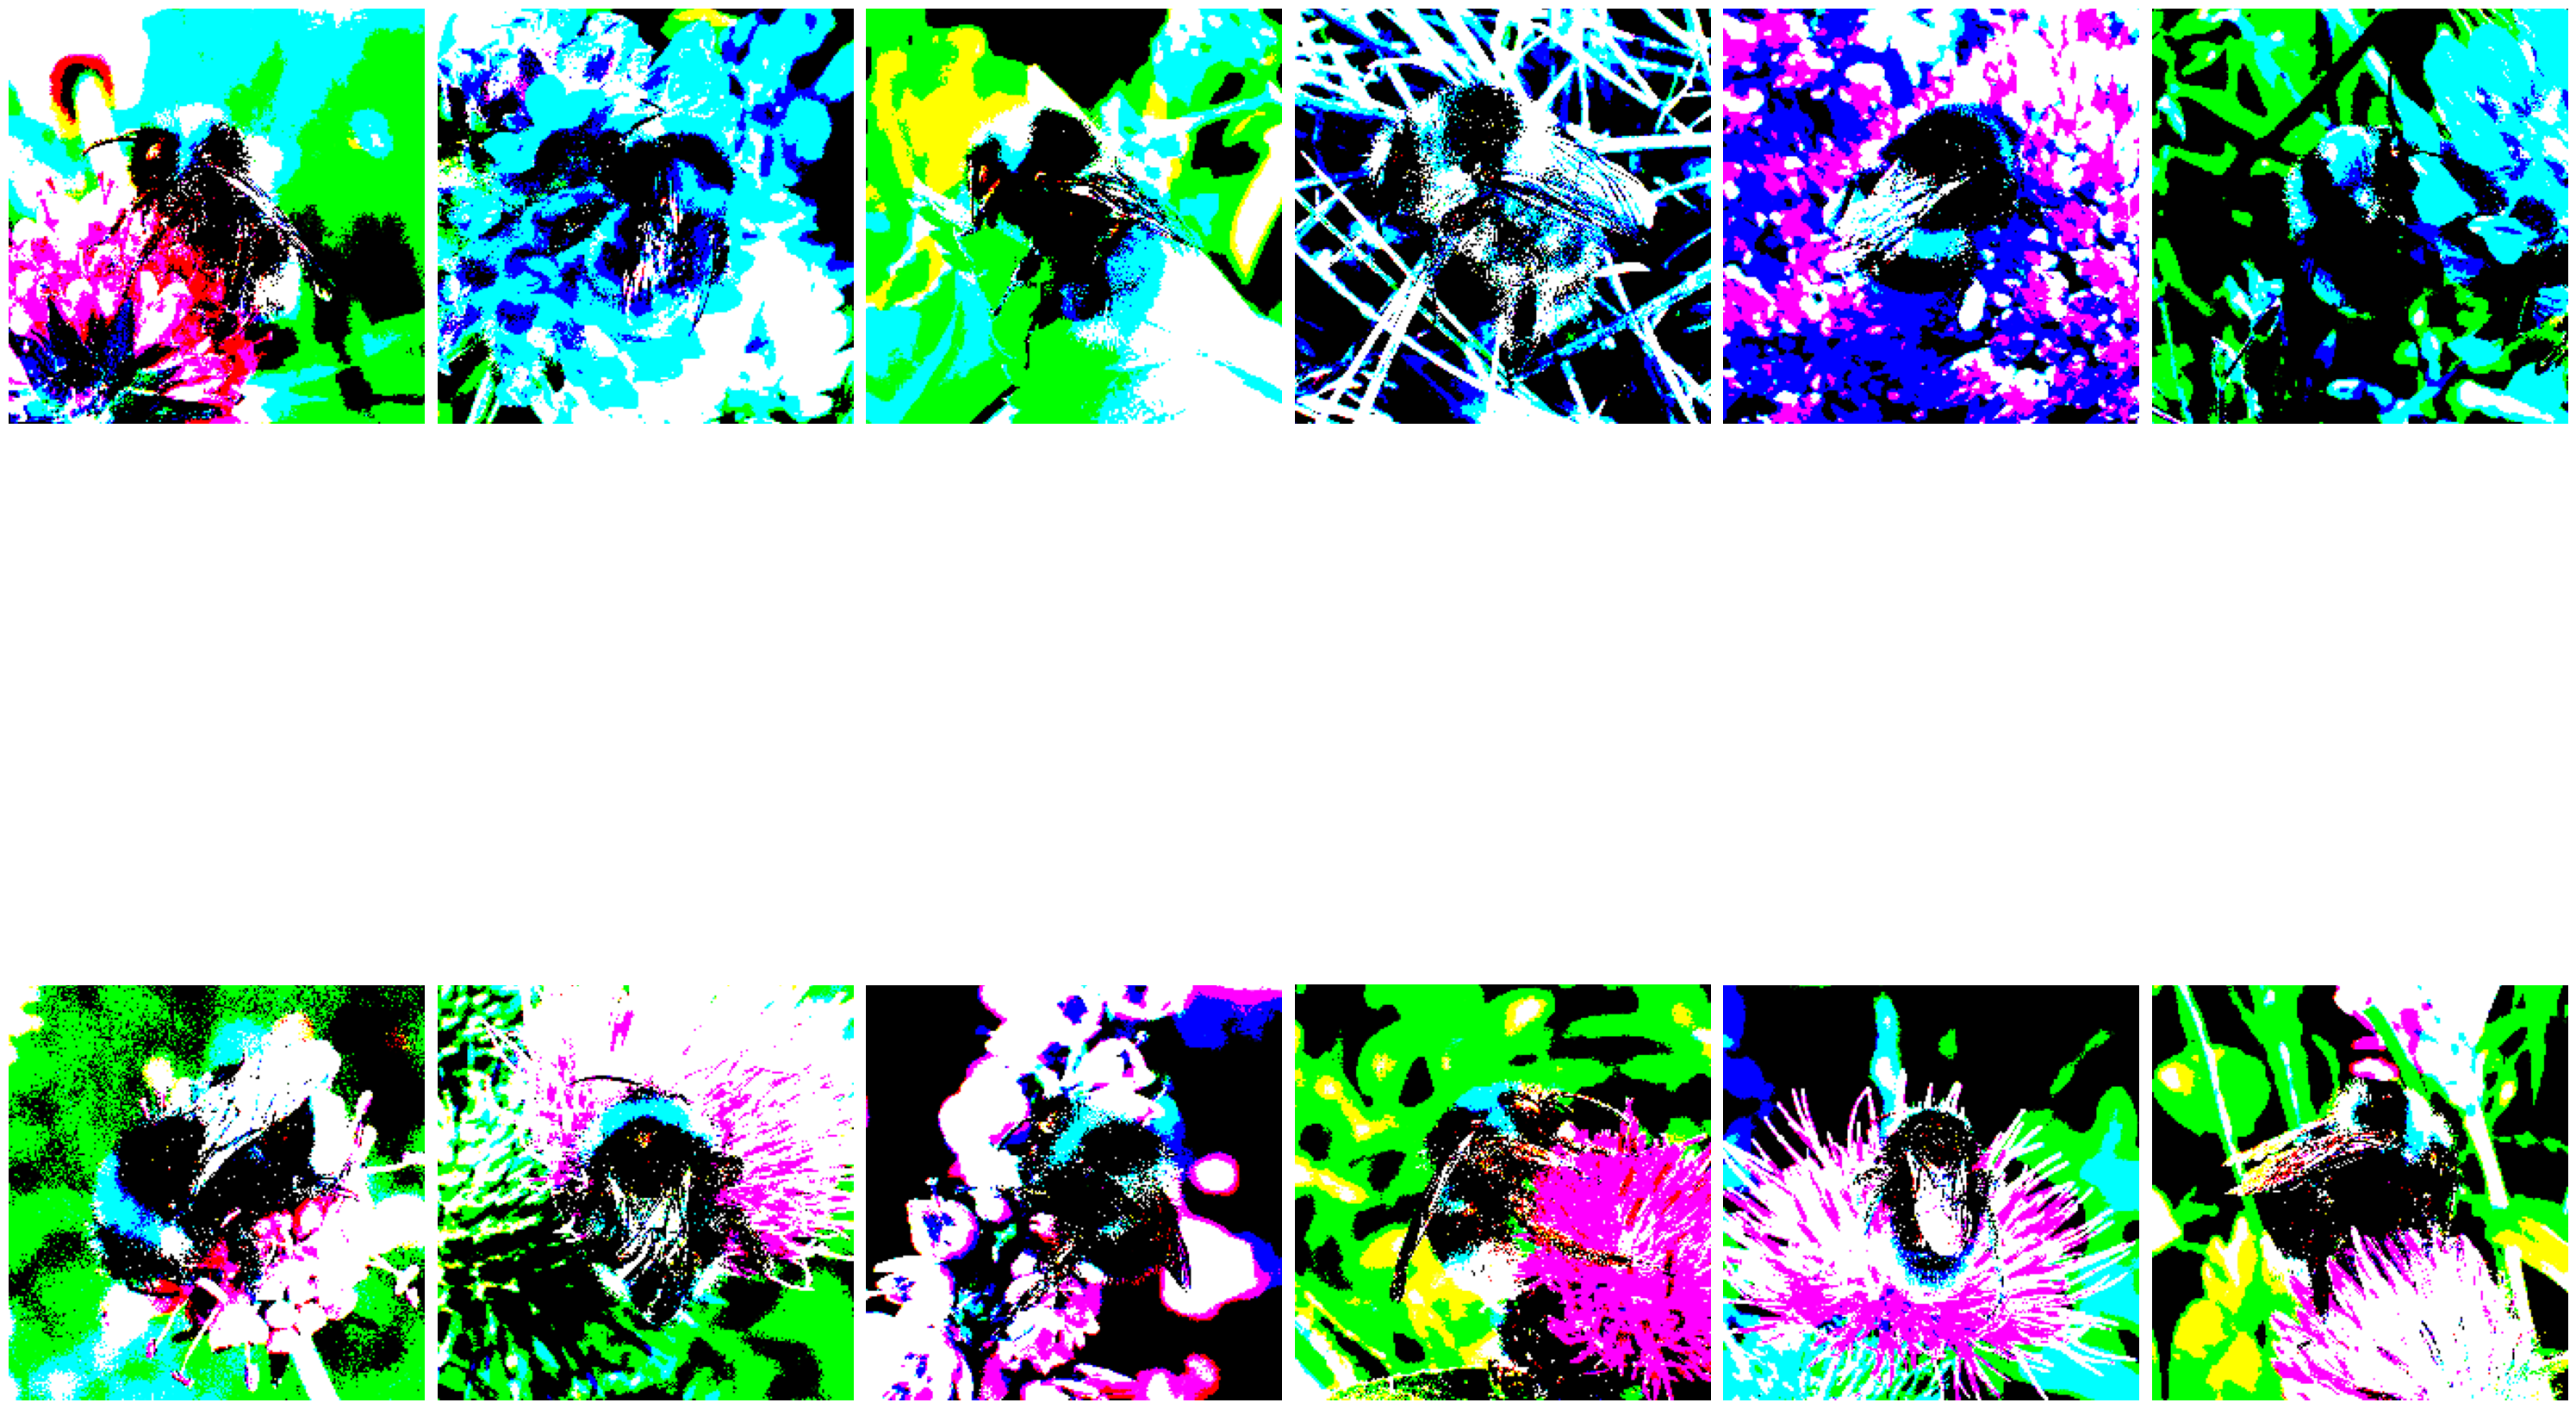

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [7]:
plotImages(imgs)
print(labels)

### Simple CNN model

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=21, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=validate_batches,
    validation_steps=len(validate_batches),
    epochs=15,
    verbose=2
)

### 1. VGG19

In [8]:
vgg19_model = tf.keras.applications.vgg19.VGG19()

In [9]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
type(vgg19_model)

keras.src.engine.functional.Functional

In [11]:
model = Sequential()
for layer in vgg19_model.layers[:-1]:
    model.add(layer)

In [12]:
for layer in model.layers:
    layer.trainable = False

In [13]:
model.add(Dense(units=21, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
result = model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=validate_batches,
          validation_steps=len(validate_batches),
          epochs=10,
          verbose=2)

Epoch 1/10
42/42 - 37s - loss: 3.7199 - accuracy: 0.0635 - val_loss: 3.3958 - val_accuracy: 0.0480 - 37s/epoch - 874ms/step
Epoch 2/10
42/42 - 36s - loss: 2.9145 - accuracy: 0.1508 - val_loss: 3.1355 - val_accuracy: 0.1040 - 36s/epoch - 859ms/step
Epoch 3/10
42/42 - 37s - loss: 2.5068 - accuracy: 0.2540 - val_loss: 2.9362 - val_accuracy: 0.1360 - 37s/epoch - 873ms/step
Epoch 4/10
42/42 - 36s - loss: 2.1935 - accuracy: 0.3294 - val_loss: 2.8037 - val_accuracy: 0.2080 - 36s/epoch - 868ms/step
Epoch 5/10
42/42 - 36s - loss: 1.9146 - accuracy: 0.4087 - val_loss: 2.6980 - val_accuracy: 0.2720 - 36s/epoch - 863ms/step
Epoch 6/10
42/42 - 36s - loss: 1.6947 - accuracy: 0.5040 - val_loss: 2.6197 - val_accuracy: 0.2800 - 36s/epoch - 858ms/step
Epoch 7/10
42/42 - 36s - loss: 1.5153 - accuracy: 0.5853 - val_loss: 2.5599 - val_accuracy: 0.3040 - 36s/epoch - 862ms/step
Epoch 8/10
42/42 - 36s - loss: 1.3631 - accuracy: 0.6349 - val_loss: 2.5112 - val_accuracy: 0.3200 - 36s/epoch - 862ms/step
Epoch 9/

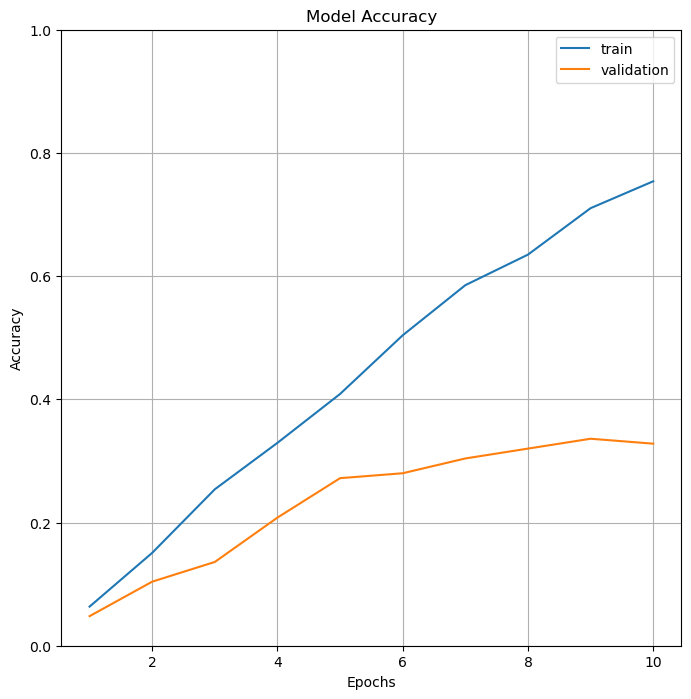

In [25]:
plt.figure(figsize=(8, 8))
epochs_range=np.arange(1, 11)
plt.plot(epochs_range, result.history['accuracy'], label="Training Accuracy")
plt.plot(epochs_range, result.history['val_accuracy'], label="Validation Accuracy")
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

### 2. ResNet50

In [26]:
resnet50 = tf.keras.applications.ResNet50V2(include_top=False,
                                            input_shape=(180, 180, 3),
                                            pooling='avg', classes=21,
                                            weights="imagenet")

In [27]:
resnet50.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 186, 186, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 90, 90, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 92, 92, 64)           0         ['conv1_conv[0][0]']          
                                                                                         

 tchNormalization)                                                                                
                                                                                                  
 conv2_block3_preact_relu (  (None, 45, 45, 256)          0         ['conv2_block3_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 45, 45, 64)           16384     ['conv2_block3_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 45, 45, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv3_block2_1_relu (Activ  (None, 23, 23, 128)          0         ['conv3_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_2_pad (ZeroPa  (None, 25, 25, 128)          0         ['conv3_block2_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_block2_2_conv (Conv2  (None, 23, 23, 128)          147456    ['conv3_block2_2_pad[0][0]']  
 D)                                                                                               
                                                                                                  
 conv3_block2_2_bn (BatchNo  (None, 23, 23, 128)          512       ['conv3_block2_2_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv3_block4_3_conv (Conv2  (None, 12, 12, 512)          66048     ['conv3_block4_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block4_out (Add)      (None, 12, 12, 512)          0         ['max_pooling2d_1[0][0]',     
                                                                     'conv3_block4_3_conv[0][0]'] 
                                                                                                  
 conv4_block1_preact_bn (Ba  (None, 12, 12, 512)          2048      ['conv3_block4_out[0][0]']    
 tchNormalization)                                                                                
                                                                                                  
 conv4_blo

 D)                                                                 0]']                          
                                                                                                  
 conv4_block3_1_bn (BatchNo  (None, 12, 12, 256)          1024      ['conv4_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block3_1_relu (Activ  (None, 12, 12, 256)          0         ['conv4_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block3_2_pad (ZeroPa  (None, 14, 14, 256)          0         ['conv4_block3_1_relu[0][0]'] 
 dding2D)                                                                                         
          

 conv4_block5_2_relu (Activ  (None, 12, 12, 256)          0         ['conv4_block5_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block5_3_conv (Conv2  (None, 12, 12, 1024)         263168    ['conv4_block5_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block5_out (Add)      (None, 12, 12, 1024)         0         ['conv4_block4_out[0][0]',    
                                                                     'conv4_block5_3_conv[0][0]'] 
                                                                                                  
 conv4_block6_preact_bn (Ba  (None, 12, 12, 1024)         4096      ['conv4_block5_out[0][0]']    
 tchNormal

                                                                                                  
 conv5_block2_preact_relu (  (None, 6, 6, 2048)           0         ['conv5_block2_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv5_block2_1_conv (Conv2  (None, 6, 6, 512)            1048576   ['conv5_block2_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv5_block2_1_bn (BatchNo  (None, 6, 6, 512)            2048      ['conv5_block2_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_blo

In [28]:
type(resnet50)

keras.src.engine.functional.Functional

In [29]:
model = Sequential()
for layer in resnet50.layers:
    layer.trainable=False

In [30]:
model.add(resnet50)

In [31]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(21, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dense_2 (Dense)             (None, 21)                10773     
                                                                 
Total params: 24624661 (93.94 MB)
Trainable params: 1059861 (4.04 MB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [33]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
result = model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=validate_batches,
          validation_steps=len(validate_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
42/42 - 11s - loss: 293.7700 - accuracy: 0.0476 - val_loss: 100.4401 - val_accuracy: 0.0480 - 11s/epoch - 259ms/step
Epoch 2/10
42/42 - 9s - loss: 73.3423 - accuracy: 0.0675 - val_loss: 48.8407 - val_accuracy: 0.0400 - 9s/epoch - 213ms/step
Epoch 3/10
42/42 - 9s - loss: 44.5809 - accuracy: 0.0992 - val_loss: 38.9166 - val_accuracy: 0.0720 - 9s/epoch - 212ms/step
Epoch 4/10
42/42 - 9s - loss: 28.2769 - accuracy: 0.1032 - val_loss: 23.9366 - val_accuracy: 0.0720 - 9s/epoch - 213ms/step
Epoch 5/10
42/42 - 9s - loss: 18.4918 - accuracy: 0.1329 - val_loss: 21.5677 - val_accuracy: 0.0960 - 9s/epoch - 213ms/step
Epoch 6/10
42/42 - 9s - loss: 14.9953 - accuracy: 0.1369 - val_loss: 10.8562 - val_accuracy: 0.0800 - 9s/epoch - 212ms/step
Epoch 7/10
42/42 - 9s - loss: 7.0785 - accuracy: 0.1448 - val_loss: 3.6232 - val_accuracy: 0.0240 - 9s/epoch - 212ms/step
Epoch 8/10
42/42 - 9s - loss: 3.0758 - accuracy: 0.0456 - val_loss: 3.0391 - val_accuracy: 0.0560 - 9s/epoch - 212ms/step
Epoch 9/

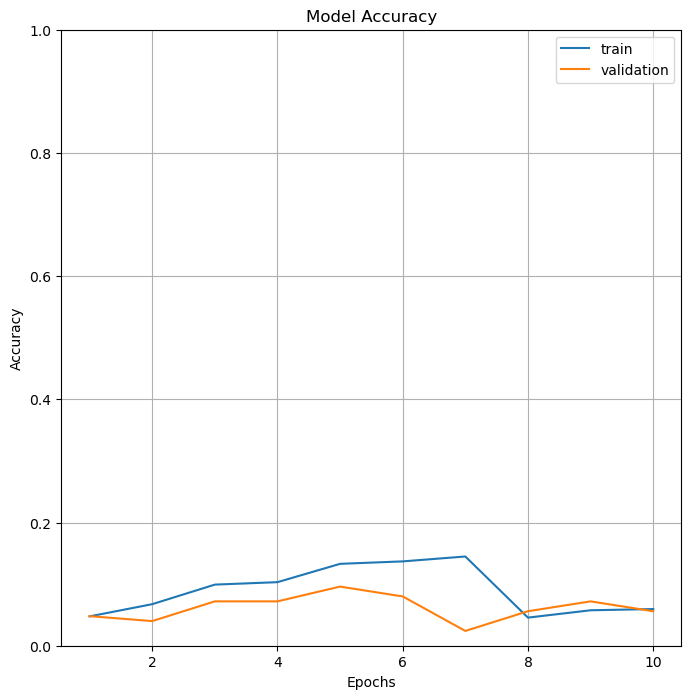

In [35]:
plt.figure(figsize=(8, 8))
epochs_range=np.arange(1, 11)
plt.plot(epochs_range, result.history['accuracy'], label="Training Accuracy")
plt.plot(epochs_range, result.history['val_accuracy'], label="Validation Accuracy")
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()